In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import csv

In [2]:
X=np.array([[np.random.randint(200),np.random.randint(15,100)] for x in range(300)])

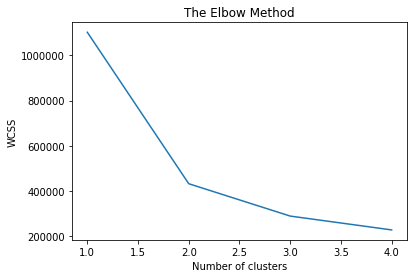

In [3]:
from sklearn.cluster import KMeans
wcss = []
for i in range(1, 5):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 5), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

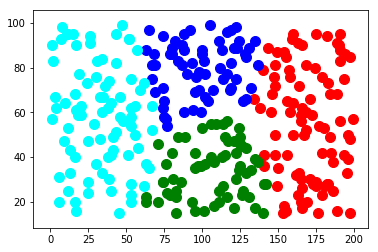

In [13]:
kmeans = KMeans(n_clusters =4, init = 'k-means++', random_state =3)
y_kmeans = kmeans.fit_predict(X)
plt.scatter(X[y_kmeans == 0, 0], X[y_kmeans == 0, 1], s = 100, c = 'red', label = 'Best')
plt.scatter(X[y_kmeans == 1, 0], X[y_kmeans == 1, 1], s = 100, c = 'blue', label = 'Nice')
plt.scatter(X[y_kmeans == 2, 0], X[y_kmeans == 2, 1], s = 100, c = 'green', label = 'Good')
plt.scatter(X[y_kmeans == 3, 0], X[y_kmeans == 3, 1], s = 100, c = 'cyan', label = 'Low')
plt.show()

In [14]:
Status=[]
for i in y_kmeans:
    if(i==0):
        Status.append('Best')
    elif(i==1):
        Status.append('Nice')
    elif(i==2):
        Status.append('Good')
    elif(i==3):
        Status.append('Low')

In [21]:
with open('Mall_Customers.csv','w') as f:
    writer=csv.writer(f)
    writer.writerow(['user_id','Salary','Spending','Type'])
    for i in range(206210):    
        j=np.random.randint(300)
        Tuple=[i]
        Tuple.append(X[j][0])
        Tuple.append(X[j][1])
        Tuple.append(j)
        writer.writerow(Tuple)

In [22]:
users=pd.read_csv('Mall_Customers.csv')

In [23]:
users=users.dropna(axis=0, how='all')

In [24]:
users.to_csv('Mall_Customers.csv',index=False)

In [3]:
Userproducts=pd.read_csv('UserProducts.csv')

In [4]:
Score=pd.merge(Userproducts,users,on=['user_id','user_id'])

In [5]:
ProductRating=Score.groupby(['product_id','Type']).size().reset_index(name='counts').sort_values('counts',ascending=False)

In [6]:
with open("ProductRating.csv", "w") as file:
    writer = csv.writer(file)
    writer.writerow(['product_id','type'])
    for i in range(1,49689):
        ProductDetails=ProductRating[(ProductRating['product_id']==i)]
        Total=sum(ProductDetails['counts'])
        List=ProductDetails['Type'].values
        Type=['Low','Good','Nice','Best']
        Hash=dict()
        for id in range(len(List)):
            for j in Type:
                if List[id]==j:
                    Hash[j]=ProductDetails['counts'].values[id]
        for Priority in Type:
            try:
                if Hash[Priority]>=0.2*Total:
                    writer.writerow([i,Priority])
                    break
            except:
                pass

In [7]:
ProductScore=pd.read_csv('ProductRating.csv')
ProductScore=ProductScore.dropna(axis=0, how='all')
ProductScore.to_csv('ProductRating.csv',index=False)